In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
 
#Load Data

In [ ]:
#df_hfi = pd.read_csv('hfi_cc_2020.csv', delimiter=',')
#df_whr = pd.read_csv('world-happiness-report.csv', delimiter=',')
df_hfi = pd.read_csv('hfi_cc_2020.csv', delimiter=',')
df_whr = pd.read_csv('world-happiness-report.csv', delimiter=',')



#original = df

df_whr #[df_whr["Country name"] == "Denmark"]

Country name  year  ...  Positive affect  Negative affect
0     Afghanistan  2008  ...            0.518            0.258
1     Afghanistan  2009  ...            0.584            0.237
2     Afghanistan  2010  ...            0.618            0.275
3     Afghanistan  2011  ...            0.611            0.267
4     Afghanistan  2012  ...            0.710            0.268
...           ...   ...  ...              ...              ...
1944     Zimbabwe  2016  ...            0.738            0.209
1945     Zimbabwe  2017  ...            0.806            0.224
1946     Zimbabwe  2018  ...            0.710            0.212
1947     Zimbabwe  2019  ...            0.716            0.235
1948     Zimbabwe  2020  ...            0.703            0.346

[1949 rows x 11 columns]

In [ ]:
df_whr = df_whr.rename(columns={'Country name': 'countries'})
              
df_join = df_hfi.set_index(['countries', 'year']).join(df_whr[["year", "countries", "Life Ladder"]].set_index(['countries', 'year']))

df_join = df_join.drop(columns=["Unnamed: 0"])

df_join = df_join.reset_index()



df_join

df = df_join

In [ ]:
df

countries  year ISO_code  ... ef_rank  womens_freedom  Life Ladder
0      Albania  2018      ALB  ...    26.0            9.26        5.004
1      Albania  2017      ALB  ...    36.0            9.26        4.640
2      Albania  2016      ALB  ...    36.0            7.50        4.511
3      Albania  2015      ALB  ...    34.0            7.50        4.607
4      Albania  2014      ALB  ...    37.0            7.50        4.814
...        ...   ...      ...  ...     ...             ...          ...
1777  Zimbabwe  2012      ZWE  ...   148.0            7.50        4.955
1778  Zimbabwe  2011      ZWE  ...   150.0            7.50        4.846
1779  Zimbabwe  2010      ZWE  ...   151.0            7.36        4.682
1780  Zimbabwe  2009      ZWE  ...   140.0            7.36        4.056
1781  Zimbabwe  2008      ZWE  ...   139.0            7.36        3.174

[1782 rows x 113 columns]

In [ ]:
df.columns

Index(['countries', 'year', 'ISO_code', 'region', 'hf_score', 'hf_rank',
       'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal',
       ...
       'ef_regulation_business_start', 'ef_regulation_business_bribes',
       'ef_regulation_business_licensing', 'ef_regulation_business_compliance',
       'ef_regulation_business', 'ef_regulation', 'ef_score', 'ef_rank',
       'womens_freedom', 'Life Ladder'],
      dtype='object', length=113)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Columns: 113 entries, countries to Life Ladder
dtypes: float64(109), int64(1), object(3)
memory usage: 1.5+ MB


Feature Analysis

In [ ]:
df['year'].value_counts()

2018    162
2017    162
2016    162
2015    162
2014    162
2013    162
2012    162
2011    162
2010    162
2009    162
2008    162
Name: year, dtype: int64

In [ ]:
df['countries'].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong SAR, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran, Islam

In [ ]:
df['countries'].value_counts()

Burkina Faso                11
Costa Rica                  11
Libya                       11
Namibia                     11
Suriname                    11
                            ..
Kuwait                      11
Lao PDR                     11
Israel                      11
Germany                     11
Central African Republic    11
Name: countries, Length: 162, dtype: int64

In [ ]:
df['Life Ladder'].describe()

count    1271.000000
mean        5.505765
std         1.134986
min         2.693000
25%         4.635500
50%         5.432000
75%         6.376500
max         7.971000
Name: Life Ladder, dtype: float64

In [ ]:
df['hf_score'].describe()

count    1702.000000
mean        7.007620
std         1.075148
min         3.600000
25%         6.260000
50%         6.990000
75%         7.960000
max         8.990000
Name: hf_score, dtype: float64

Visualize features columns

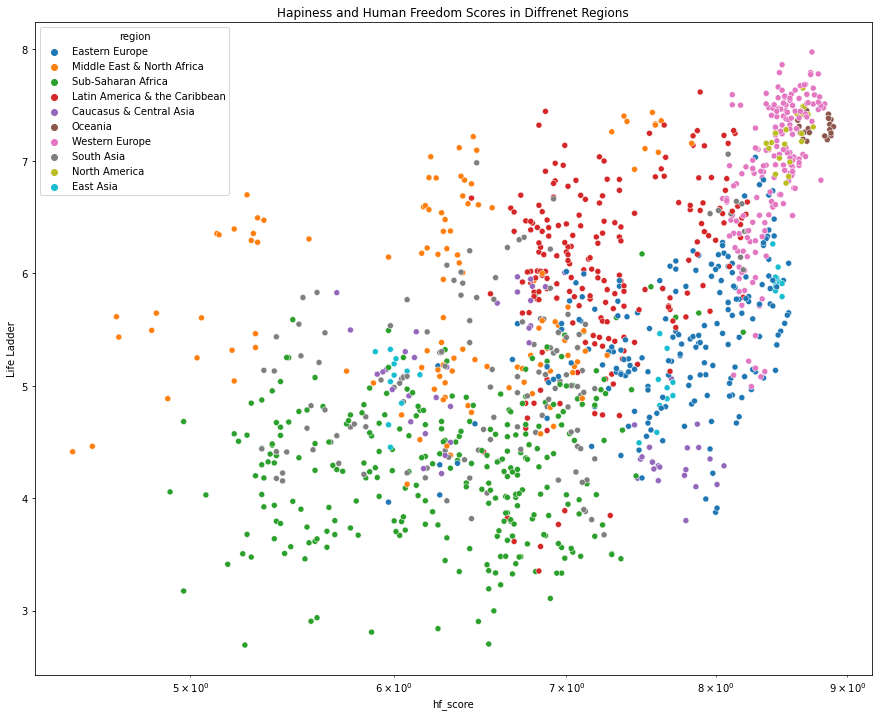

In [ ]:
#Visualization with Scatter Plot
plt.figure(figsize=(15,12))
g =sns.scatterplot(x="hf_score", y="Life Ladder", hue="region", data=df)
g.set(xscale="log")

plt.title('Hapiness and Human Freedom Scores in Diffrenet Regions')

plt.show()

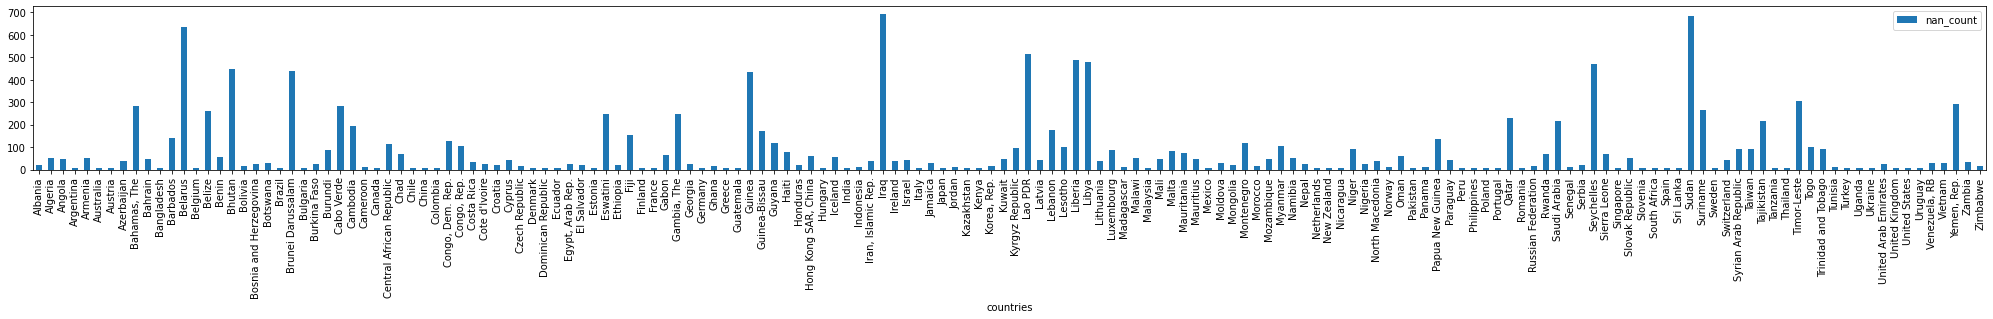

In [ ]:
features = ["pf_movement", "pf_religion", "pf_movement", "pf_expression", 
                   "pf_association", "pf_ss", "ef_government", "ef_legal", "pf_rol", 
                  "ef_government", "ef_regulation", "ef_trade", "ef_money", 
            "year", "countries", "region", "Life Ladder", "nan_count"
                   ]
df_join["nan_count"] = df_join.isna().sum(axis=1)
country_nan_data = df_join[features][["countries", "nan_count"]].groupby('countries')["nan_count"].sum()
region_nan_data = df_join[features][["region", "nan_count"]].groupby('region')["nan_count"].sum()

#region_nan_data.plot(kind="bar", legend=True)
country_nan_data.plot(kind="bar", legend=True, figsize=(35,3))

#country_nan_data.max()

# cols = df_join.columns.tolist()
# cols.remove("countries")
# cols.remove("region")
# cols.remove("ISO_code")
# cols.remove("Errors")

# df_join['Errors'] = df_join.apply(lambda row: ' + '.join(i for i in cols if np.isnan(row[i])), axis=1)

# errorSet = set()
# def addToSet(row):
#   errorSet.add(row["Errors"])

# df_join.apply(lambda row: addToSet(row), axis=1)

# errorSet

Distribution with Histograms

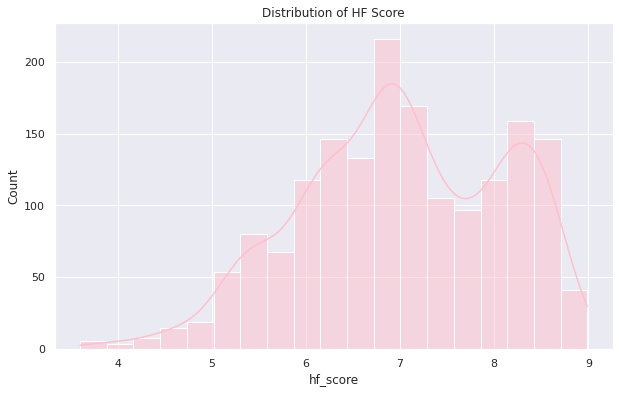

In [ ]:
#Checking Distribution for selected variables for Exploratory Data Analysis 
fig = plt.figure(figsize=(10,6))
sns.set(color_codes=True)
sns.histplot(x = df['hf_score'], color ='pink', kde = True).set_title('Distribution of HF Score')
plt.show()

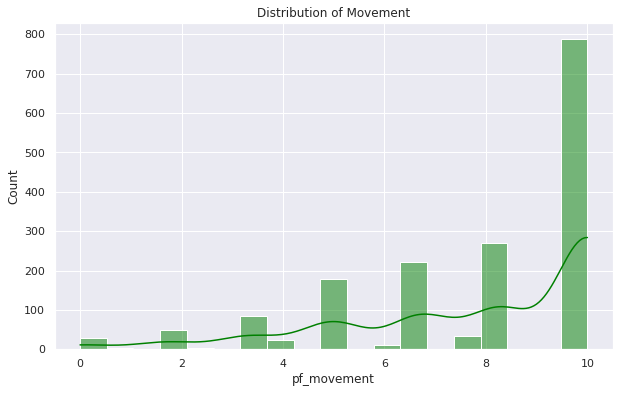

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.set(color_codes=True)
sns.histplot(x = df['pf_movement'], color ='green', kde = True).set_title('Distribution of Movement')
plt.show()

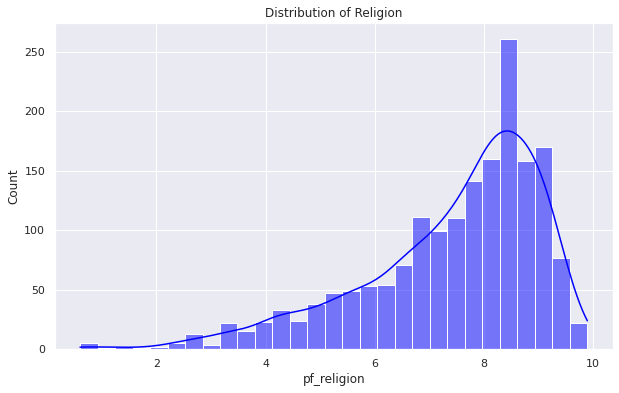

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.set(color_codes=True)
sns.histplot(x = df['pf_religion'], color ='blue', kde = True).set_title('Distribution of Religion')
plt.show()

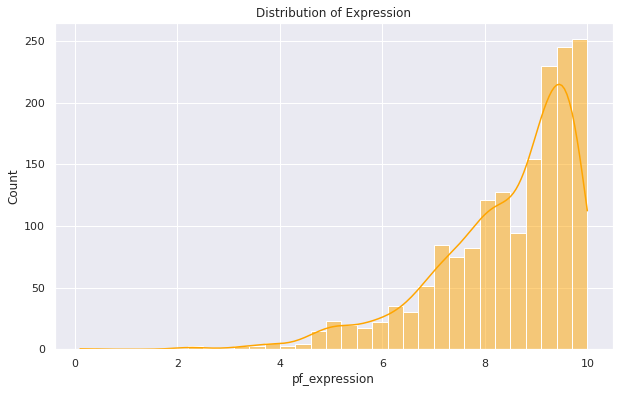

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.set(color_codes=True)
sns.histplot(x = df['pf_expression'], color ='orange', kde = True).set_title('Distribution of Expression')
plt.show()

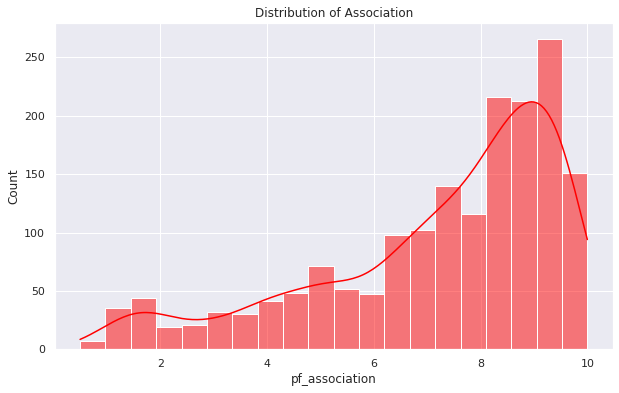

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.set(color_codes=True)
sns.histplot(x = df['pf_association'], color ='red', kde = True).set_title('Distribution of Association')
plt.show()

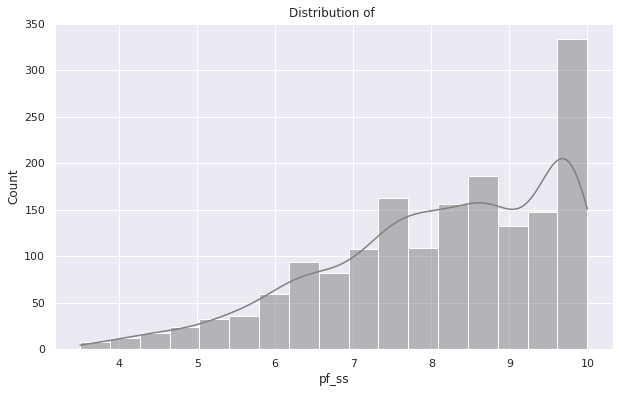

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.set(color_codes=True)
sns.histplot(x = df['pf_ss'], color ='grey', kde = True).set_title('Distribution of ')
plt.show()

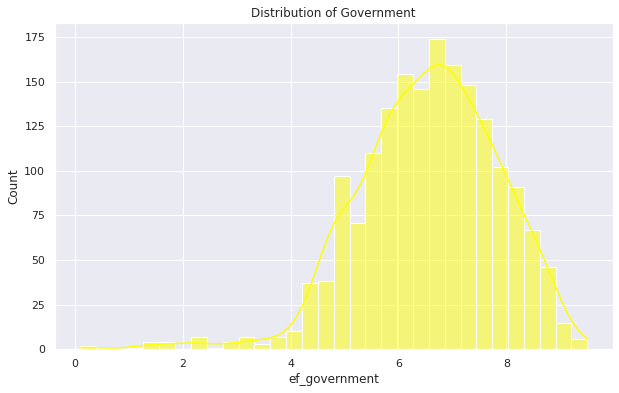

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.set(color_codes=True)
sns.histplot(x = df['ef_government'], color ='yellow', kde = True).set_title('Distribution of Government')
plt.show()

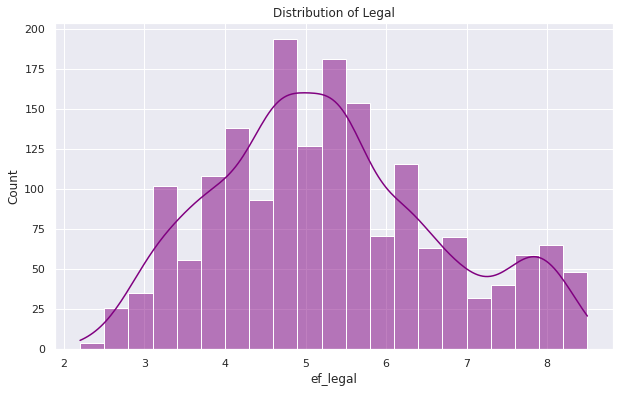

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.set(color_codes=True)
sns.histplot(x = df['ef_legal'], color ='purple', kde = True).set_title('Distribution of Legal')
plt.show()

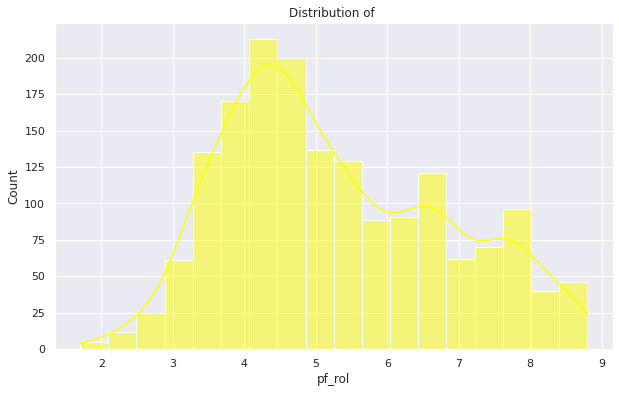

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.set(color_codes=True)
sns.histplot(x = df['pf_rol'], color ='yellow', kde = True).set_title('Distribution of ')
plt.show() 

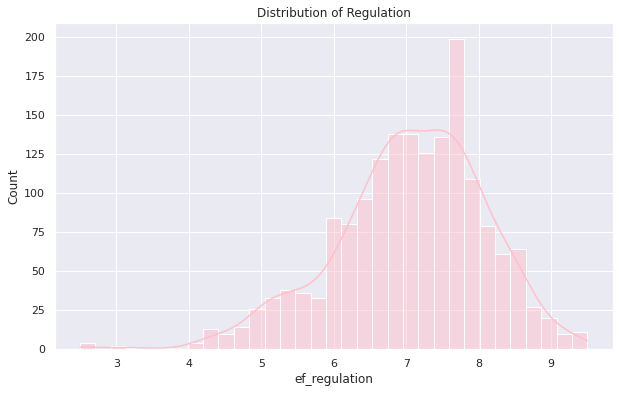

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.set(color_codes=True)
sns.histplot(x = df['ef_regulation'], color ='pink', kde = True).set_title('Distribution of Regulation')
plt.show() 

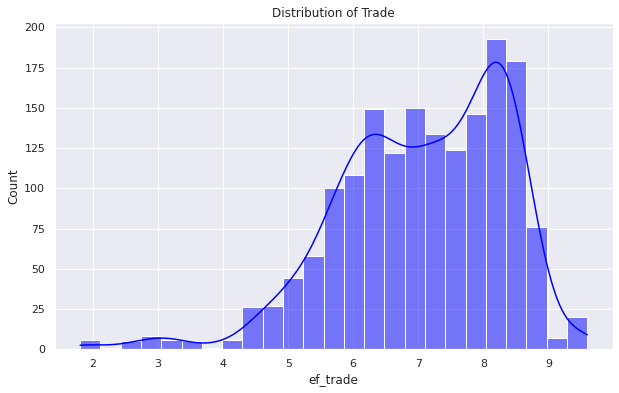

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.set(color_codes=True)
sns.histplot(x = df['ef_trade'], color ='blue', kde = True).set_title('Distribution of Trade')
plt.show() 

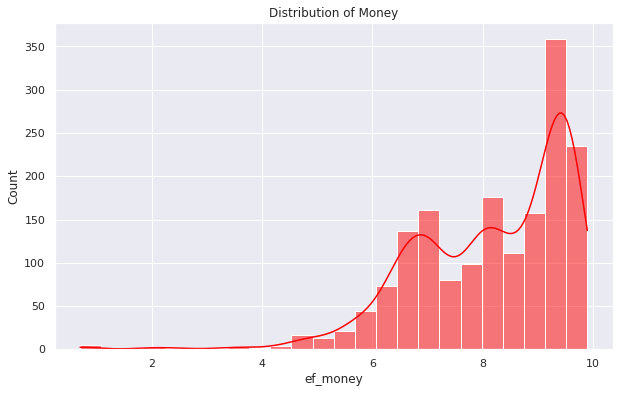

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.set(color_codes=True)
sns.histplot(x = df['ef_money'], color ='red', kde = True).set_title('Distribution of Money')
plt.show()

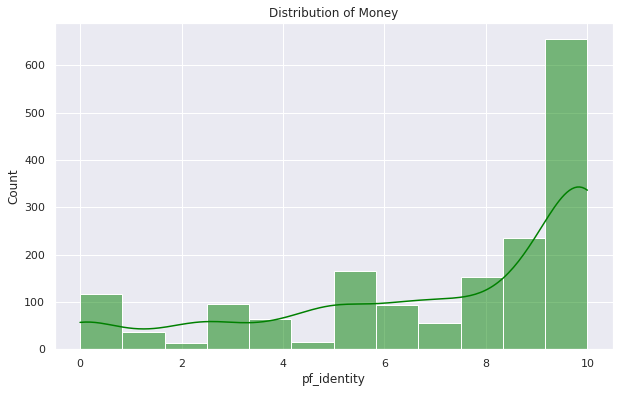

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.set(color_codes=True)
sns.histplot(x = df['pf_identity'], color ='green', kde = True).set_title('Distribution of Money')
plt.show() 

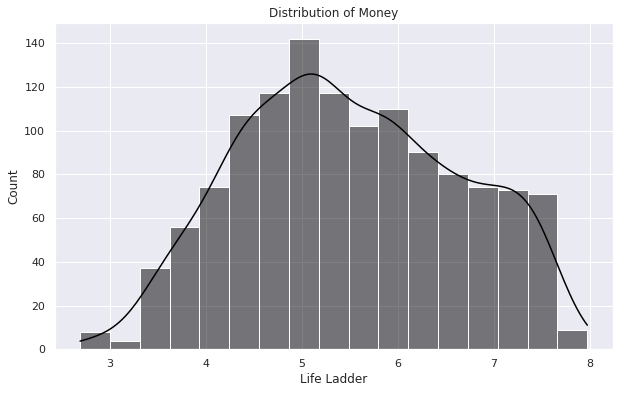

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.set(color_codes=True)
sns.histplot(x = df['Life Ladder'], color ='black', kde = True).set_title('Distribution of Money')
plt.show()

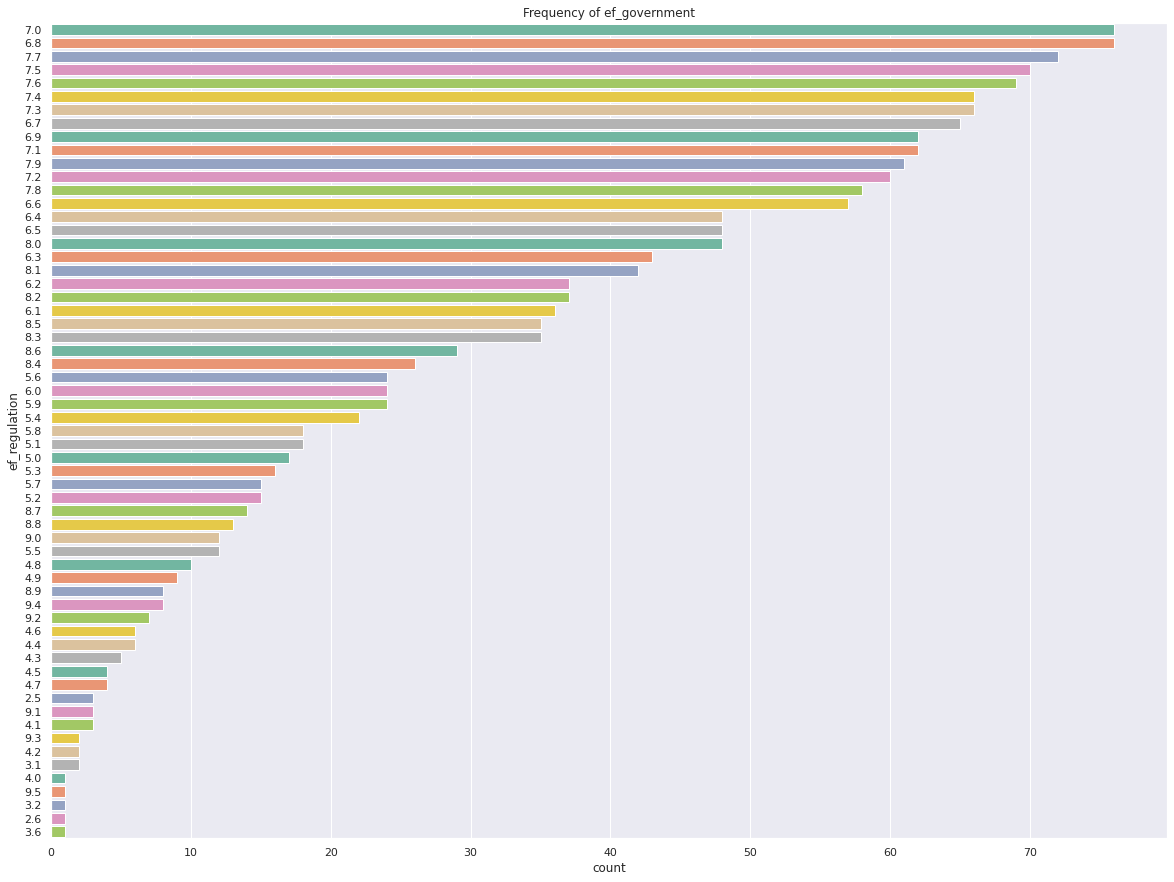

In [ ]:
#Visualization with Bar Chart
plt.figure(figsize=(20,15))
sns.set(style="darkgrid")
ax = sns.countplot(y="ef_regulation", data=df, palette="Set2", order=df['ef_regulation'].value_counts().index[0:100]).set_title("Frequency of ef_government")

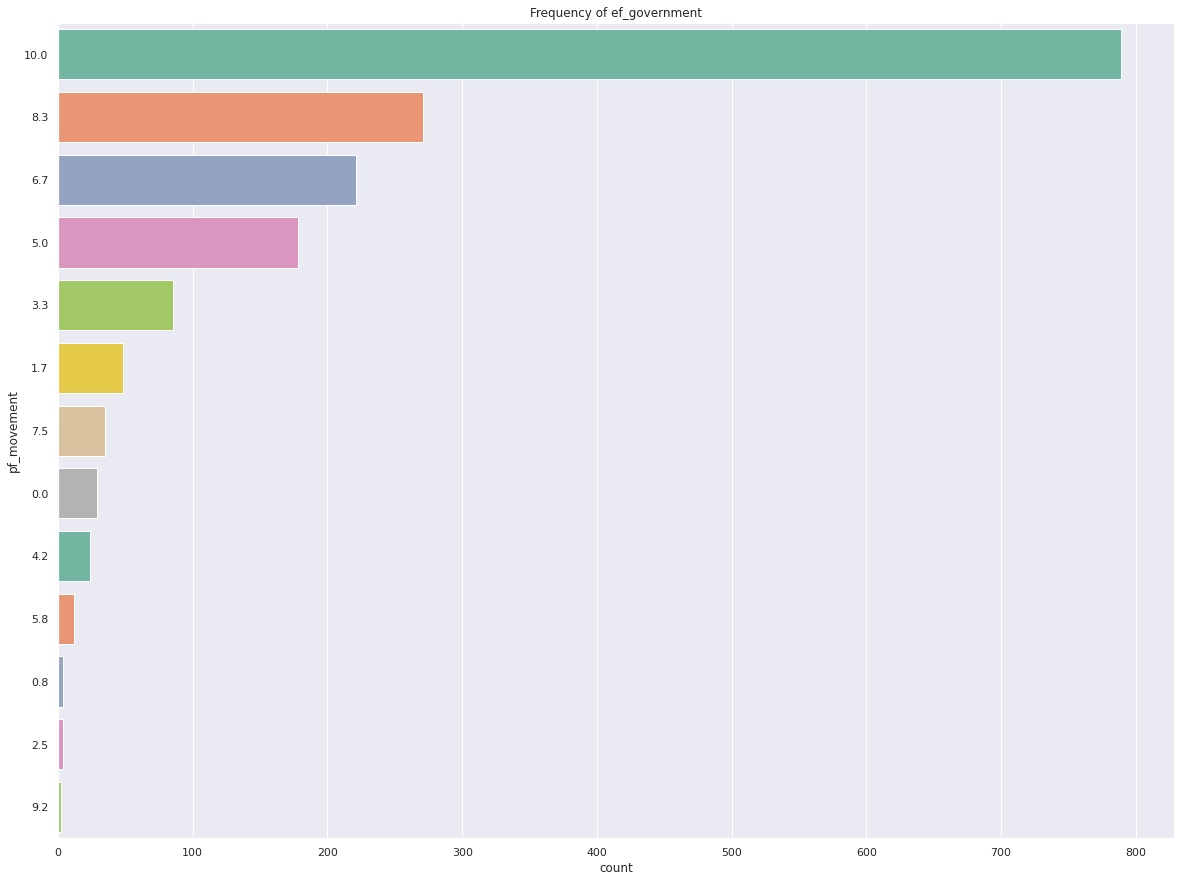

In [ ]:
#Visualization with Bar Chart
plt.figure(figsize=(20,15))
sns.set(style="darkgrid")
ax = sns.countplot(y="pf_movement", data=df, palette="Set2", order=df['pf_movement'].value_counts().index[0:100]).set_title("Frequency of ef_government")

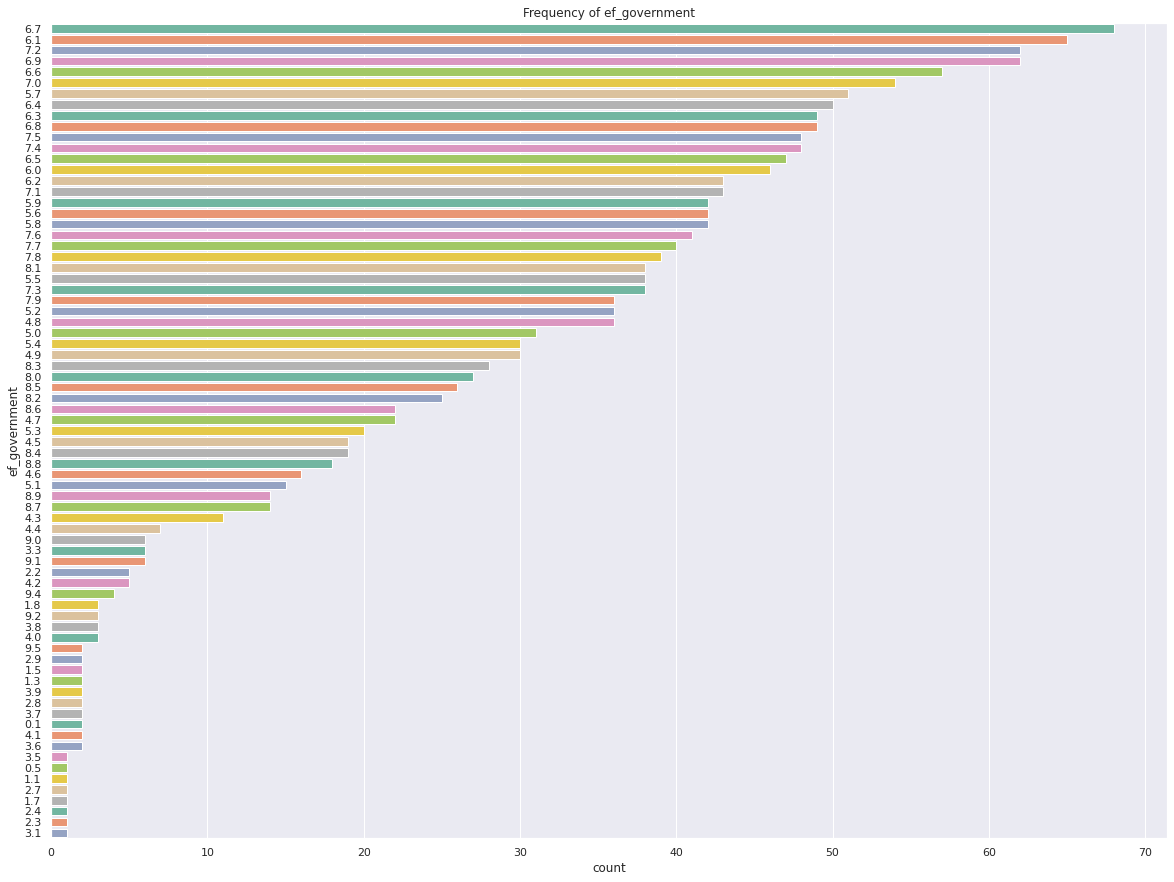

In [ ]:
# Release country bar graph
plt.figure(figsize=(20,15))
sns.set(style="darkgrid")
ax = sns.countplot(y="ef_government", data=df, palette="Set2", order=df['ef_government'].value_counts().index[0:100]).set_title("Frequency of ef_government")

Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix of Numeric Features')

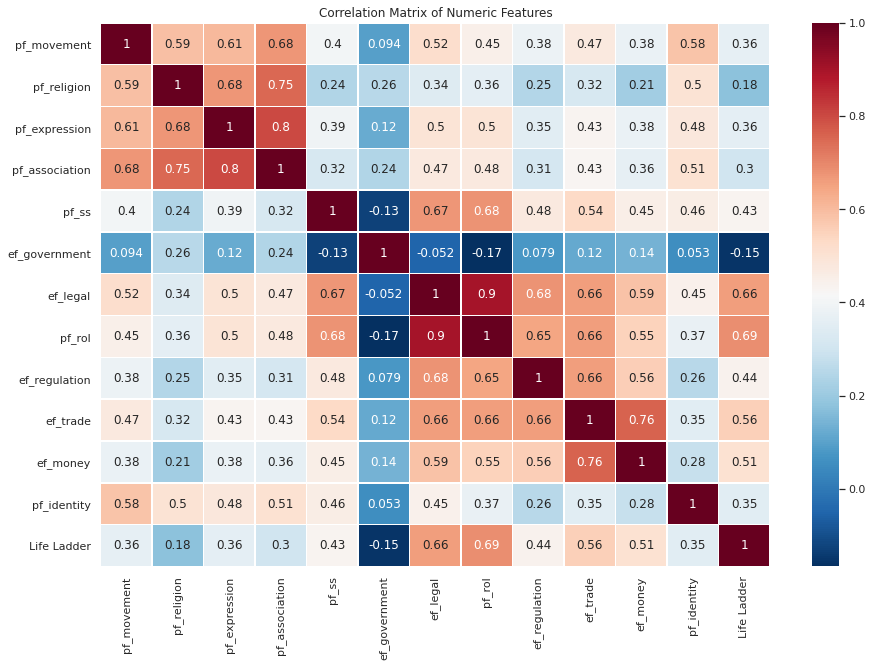

In [ ]:
from sklearn.linear_model import LinearRegression

# Calculate the Pearson correlation coefficients for the numeric features

df_features = ["pf_movement", "pf_religion", "pf_expression", 
                   "pf_association", "pf_ss", "ef_government", "ef_legal", "pf_rol", 
                   "ef_regulation", "ef_trade", "ef_money", "pf_identity", "Life Ladder"]
corr =  df[df_features].corr(method="pearson")

# Pearson - Visual Heatmap

fig, ax = plt.subplots(figsize=(15,10)) #for size of figure
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="RdBu_r", annot=True, linewidth=0.5, ax=ax).set_title('Correlation Matrix of Numeric Features')

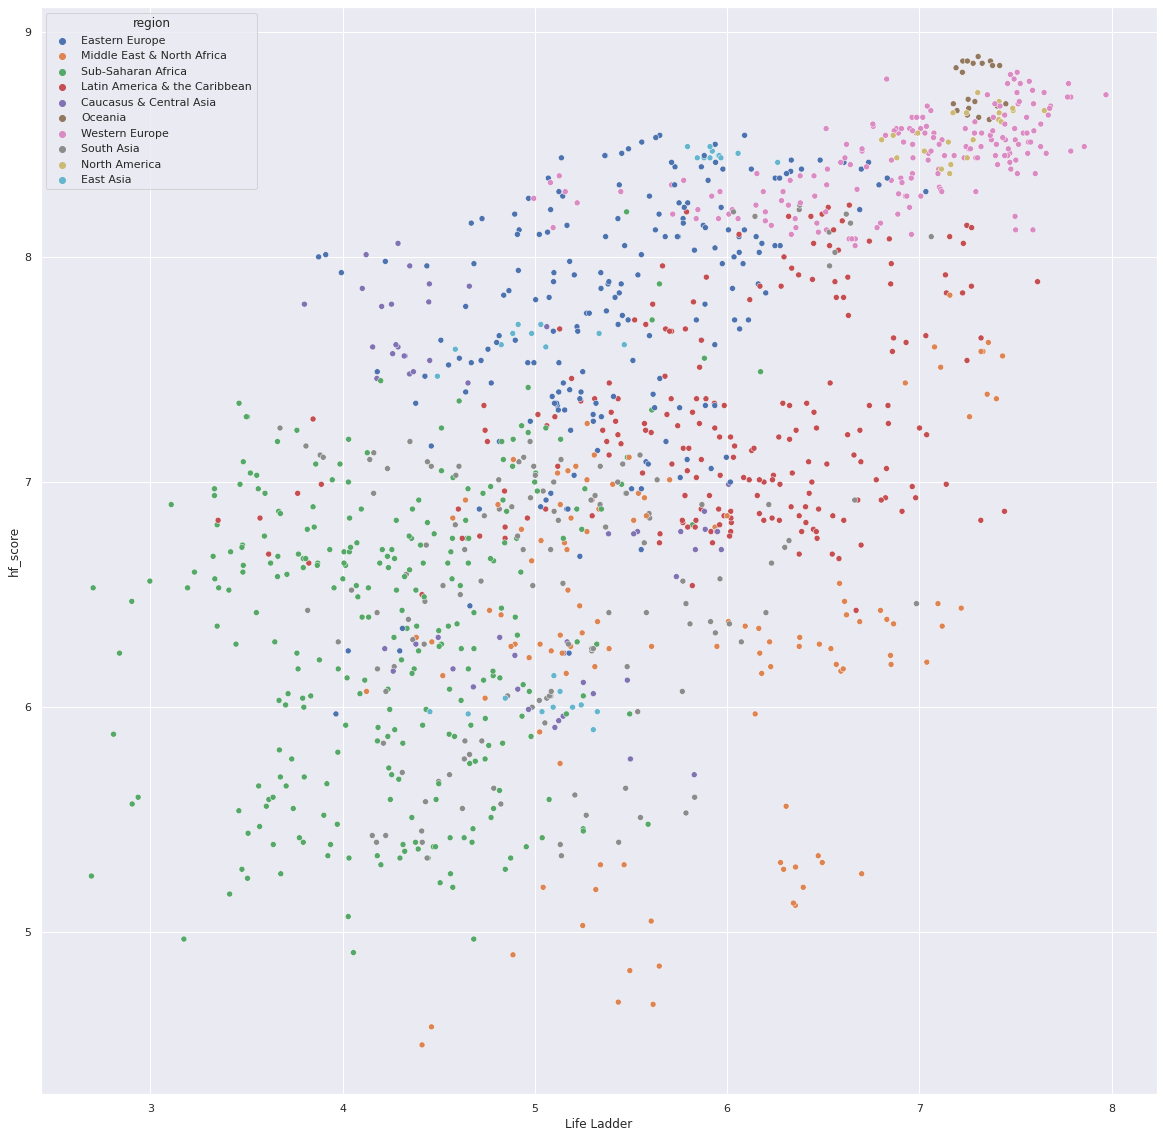

In [ ]:
#df.plot(x="hf_score", y=["Life Ladder"], color= ["green"])

plt.figure(figsize=(20, 20))
sns.scatterplot(data=df, x='Life Ladder', y='hf_score', hue='region', )

Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50cfde4910>,
      dtype=object)

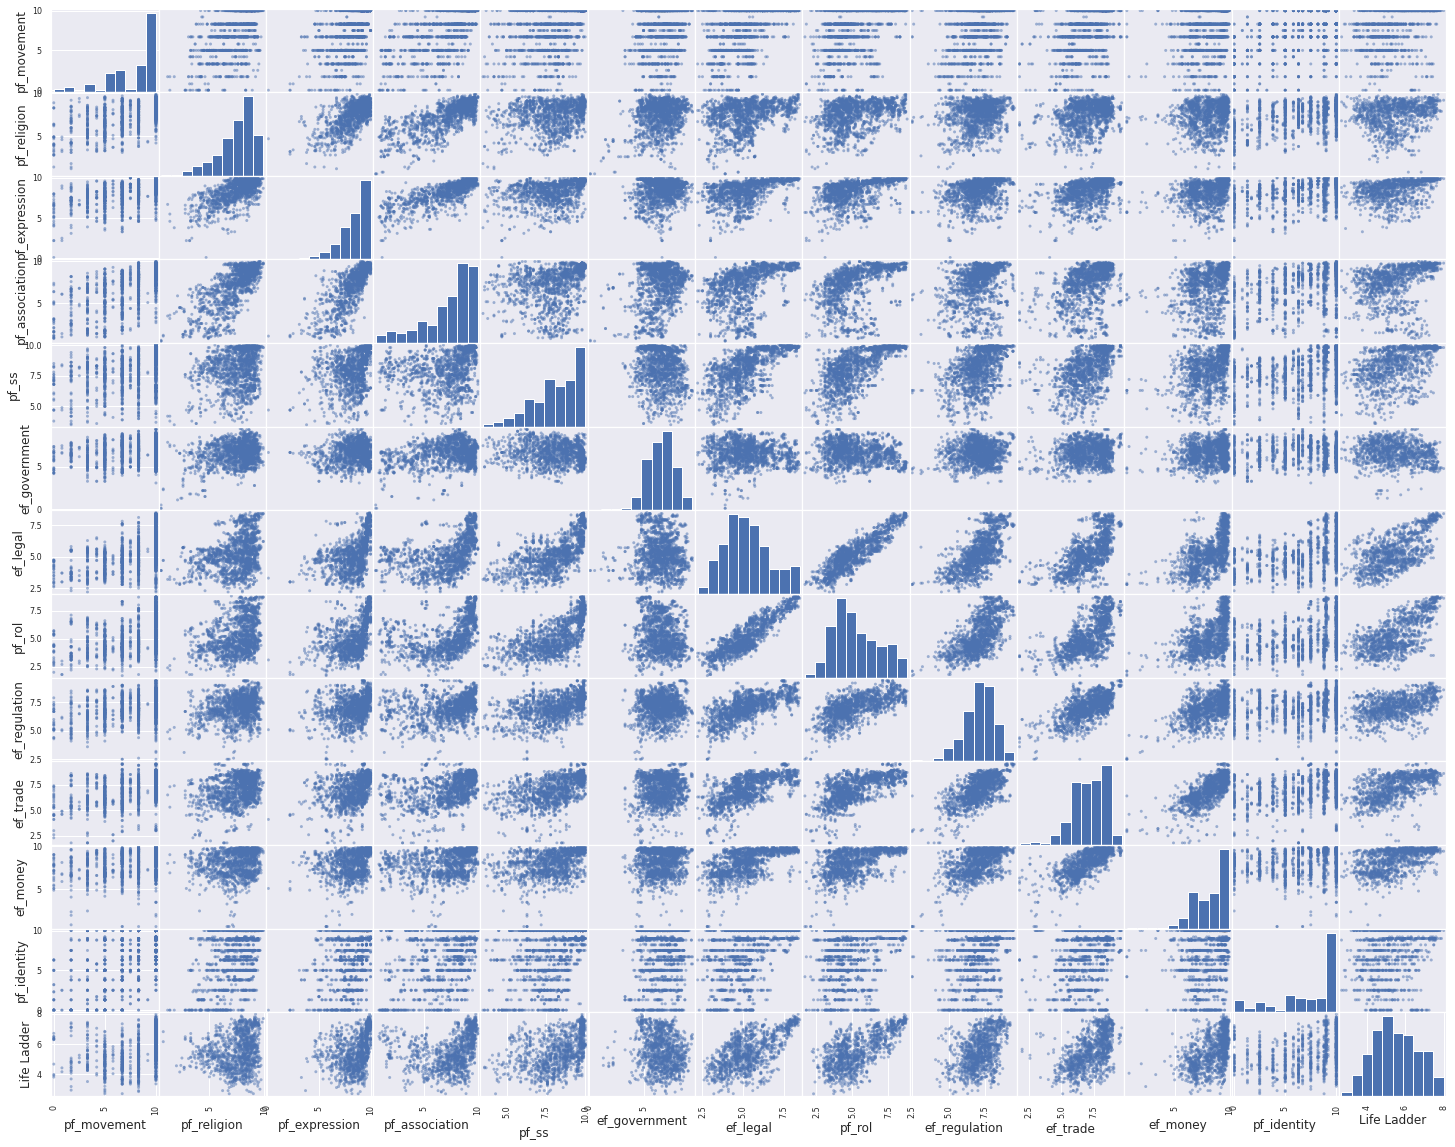

In [ ]:
# Select the numeric features that were identifed above

selected_features = df[["pf_movement", "pf_religion", "pf_expression", 
                   "pf_association", "pf_ss", "ef_government", "ef_legal", "pf_rol", 
                   "ef_regulation", "ef_trade", "ef_money", "pf_identity", "Life Ladder"]]

from pandas.plotting import scatter_matrix 


scatter_matrix(selected_features, figsize = (25, 20))

CLEANING THE DATA

In [ ]:
must_haves = ["Life Ladder", "pf_movement", "pf_religion", "pf_movement", "pf_expression", 
                   "pf_association", "pf_ss", "ef_government", "ef_legal", "pf_rol", 
                  "ef_government", "ef_regulation", "ef_trade", "ef_money", "pf_identity"]

for mh in must_haves:
  df = df[df[mh].notna()]

#df_join[df_join.countries == "Zimbabwe"]["pf_rol"]
df.isna().sum()

countries         0
year              0
ISO_code          0
region            0
hf_score          0
                 ..
ef_score          0
ef_rank           0
womens_freedom    0
Life Ladder       0
nan_count         0
Length: 114, dtype: int64

In [ ]:

import pandas as pd
from sklearn import preprocessing

features = ["pf_movement", "pf_religion", "pf_expression", 
                   "pf_association", "pf_ss", "ef_government", "ef_legal", "pf_rol", 
                  "ef_regulation", "ef_trade", "ef_money", "pf_identity", "Life Ladder"]

# for f in features:
#   x = df_join[f].values.reshape(-1,1) #returns a numpy array
#   min_max_scaler = preprocessing.MinMaxScaler()
#   x_scaled = min_max_scaler.fit_transform(x)
#   df_join[f] = pd.DataFrame(x_scaled)

#df_join[features].plot()

In [ ]:
#Dealing with N/A values
#df = df[df["year"]==2018]

df
df["nan_count"] = df.isna().sum(axis=1)

#df = df[df["nan_count"] < 25]
df

countries  year ISO_code  ... womens_freedom  Life Ladder  nan_count
0      Albania  2018      ALB  ...           9.26        5.004          0
1      Albania  2017      ALB  ...           9.26        4.640          0
2      Albania  2016      ALB  ...           7.50        4.511          0
3      Albania  2015      ALB  ...           7.50        4.607          0
4      Albania  2014      ALB  ...           7.50        4.814          1
...        ...   ...      ...  ...            ...          ...        ...
1777  Zimbabwe  2012      ZWE  ...           7.50        4.955          1
1778  Zimbabwe  2011      ZWE  ...           7.50        4.846          1
1779  Zimbabwe  2010      ZWE  ...           7.36        4.682          1
1780  Zimbabwe  2009      ZWE  ...           7.36        4.056          1
1781  Zimbabwe  2008      ZWE  ...           7.36        3.174          1

[1235 rows x 114 columns]

In [ ]:
features = ["ef_money", "hf_score", "pf_religion_freedom"]
print(df.columns)

#df = df.drop(['ISO_code', 'region'], axis = 1)

#df = df.fillna(0)#df.dropna()



df
#df = df[must_haves]

# df = df[~((df["pf_identity_sex_male"] < 9) & (df["pf_identity_sex_male"] > 1))]
# df["pf_identity_sex_male"]

Index(['countries', 'year', 'ISO_code', 'region', 'hf_score', 'hf_rank',
       'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'womens_freedom', 'Life Ladder',
       'nan_count'],
      dtype='object', length=114)


countries  year ISO_code  ... womens_freedom  Life Ladder  nan_count
0      Albania  2018      ALB  ...           9.26        5.004          0
1      Albania  2017      ALB  ...           9.26        4.640          0
2      Albania  2016      ALB  ...           7.50        4.511          0
3      Albania  2015      ALB  ...           7.50        4.607          0
4      Albania  2014      ALB  ...           7.50        4.814          1
...        ...   ...      ...  ...            ...          ...        ...
1777  Zimbabwe  2012      ZWE  ...           7.50        4.955          1
1778  Zimbabwe  2011      ZWE  ...           7.50        4.846          1
1779  Zimbabwe  2010      ZWE  ...           7.36        4.682          1
1780  Zimbabwe  2009      ZWE  ...           7.36        4.056          1
1781  Zimbabwe  2008      ZWE  ...           7.36        3.174          1

[1235 rows x 114 columns]

**Outlier Detection**

In [ ]:
# Seperate some variables for seperate boxplots
outlier_col = ["pf_movement", "pf_religion", "pf_expression", 
                   "pf_association", "pf_ss", "ef_government", "ef_legal", "pf_rol", 
                   "ef_regulation", "ef_trade", "ef_money", "pf_identity", "Life Ladder"]
# Define a new dataset since we will need a dataset with outliers and one without outliers
df_outlier = df.apply(lambda x: x)

In [ ]:
df[outlier_col].describe()

pf_movement  pf_religion  ...  pf_identity  Life Ladder
count  1235.000000  1235.000000  ...  1235.000000  1235.000000
mean      8.057328     7.604049  ...     7.449231     5.520819
std       2.406340     1.393182  ...     3.035675     1.140897
min       0.000000     2.800000  ...     0.000000     2.693000
25%       6.700000     6.800000  ...     5.750000     4.652000
50%       8.300000     8.000000  ...     8.800000     5.439000
75%      10.000000     8.600000  ...    10.000000     6.402000
max      10.000000     9.900000  ...    10.000000     7.971000

[8 rows x 13 columns]

Text(0.5, 1.0, 'Boxplot of numeric features')

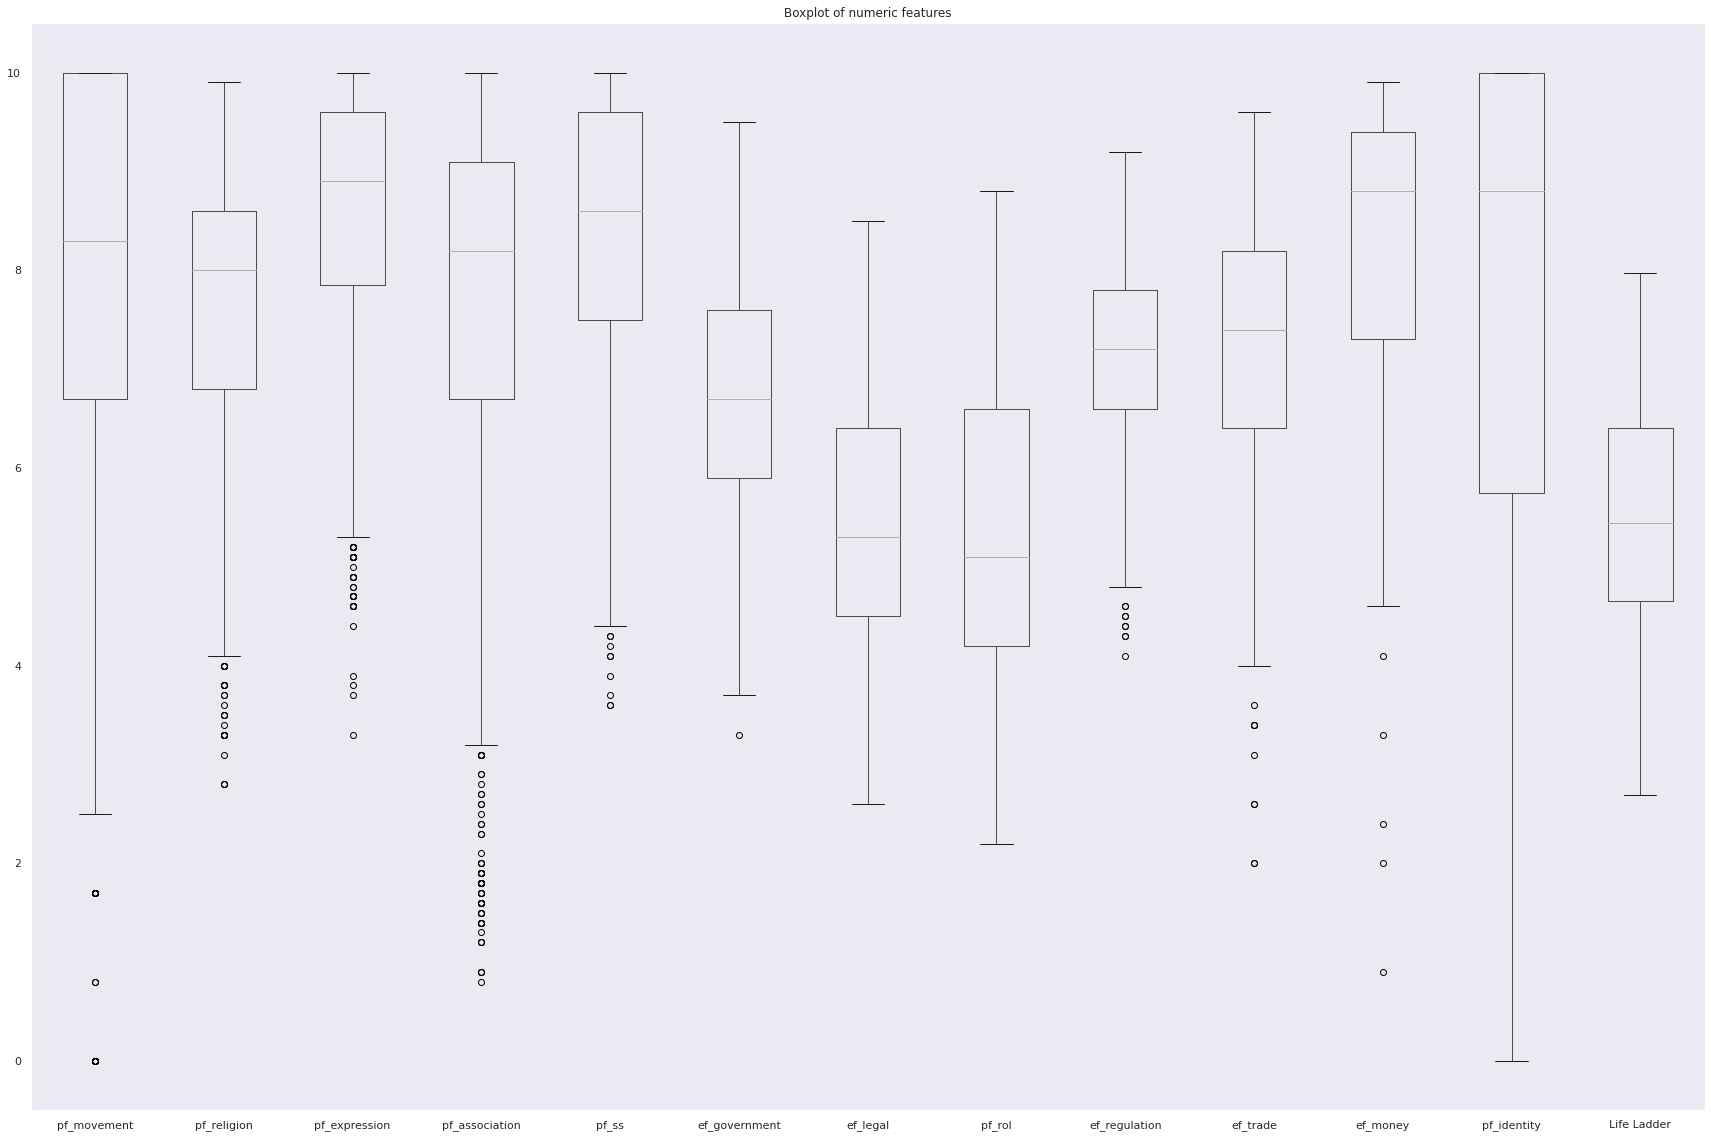

In [ ]:
df_outlier.boxplot(outlier_col, grid=False, figsize= (30, 20), fontsize=11).set_title('Boxplot of numeric features')

In [ ]:
# Removal of Outliers using IQR concept for all above drawn columns
df_outlier = df.apply(lambda x: x)

for x in outlier_col:
    q75,q25 = np.percentile(df_outlier.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max_val = q75+(1.5*intr_qr)
    min_val = q25-(1.5*intr_qr)

 # raplace data points that lie outside of the lower and the upper bound with a NULL value.
    df_outlier.loc[df_outlier[x] < min_val,x] = np.nan
    df_outlier.loc[df_outlier[x] > max_val,x] = np.nan

In [ ]:
# Having replaced the outliers with NaN, check the sum of null values or missing 
df_outlier.isnull().sum()

countries         0
year              0
ISO_code          0
region            0
hf_score          0
                 ..
ef_score          0
ef_rank           0
womens_freedom    0
Life Ladder       0
nan_count         0
Length: 114, dtype: int64

In [ ]:
# Drop the null values
df_outlier = df_outlier.dropna(axis = 0)

In [ ]:
# Check for the presence of missing or null values in the dataset
df_outlier.isnull().sum()

countries         0
year              0
ISO_code          0
region            0
hf_score          0
                 ..
ef_score          0
ef_rank           0
womens_freedom    0
Life Ladder       0
nan_count         0
Length: 114, dtype: int64

In [ ]:
df_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 1719
Columns: 114 entries, countries to nan_count
dtypes: float64(109), int64(2), object(3)
memory usage: 202.1+ KB


**Specify the training and test sets**

In [ ]:
regr_feature_cols = ["pf_movement", "pf_religion", "pf_movement", "pf_expression", 
                   "pf_association", "pf_ss", "ef_government", "ef_legal", "pf_rol", 
                  "ef_government", "ef_regulation", "ef_trade", "ef_money", "pf_identity"]

#df = df[df['pf_movement'].notna()]

random_state = 666
X_train, X_test, y_train, y_test = train_test_split(df[regr_feature_cols], df["Life Ladder"], test_size=0.2, random_state=random_state)                 

**Predict life ladder based on selected features from freedom index**

In [ ]:
predictions = {}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from statistics import mean
from sklearn.metrics import mean_squared_error
import math


# RANDOM FOREST REGRESSOR 
RF_regr = RandomForestRegressor(max_depth=50, n_estimators=100, random_state=0)
RF_regr.fit(X_train, y_train)

y_pred_RF = RF_regr.predict(X_test)

predictions[RF_regr] = y_pred_RF


In [ ]:
# SVR

from sklearn.svm import SVR

SVR = SVR()
SVR.fit(X_train, y_train)

y_pred_SVR = SVR.predict(X_test)


predictions[SVR] = y_pred_SVR

In [ ]:
from sklearn import linear_model

# Create linear regression object
LR = linear_model.LinearRegression()
LR.fit(X_train, y_train)

y_pred_LR = LR.predict(X_test)

predictions[LR] = y_pred_LR

**Evaluate regressor models**

In [ ]:
# EVALUATE THE MODELS
print("Mean: ", df["Life Ladder"].mean())

def calculate_R2_score(predicted):
  r2 = r2_score(y_test, predicted)
  print('Mean absolute error: %.4f' %(mean(abs(y_test - predicted))))
  print('Mean square error: %.4f' % mean_squared_error(y_test, predicted))
  print("Root mean square error: %.4f" % math.sqrt(mean_squared_error(y_test, predicted)))
  print("R-squared: %.4f" % (r2))

for model, pred in predictions.items():
  print(model)
  print(calculate_R2_score(pred))

Mean:  5.5208186234817775
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
Mean absolute error: 0.3285
Mean square error: 0.1833
Root mean square error: 0.4282
R-squared: 0.8483
None
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Mean absolute error: 0.4412
Mean square error: 0.3319
Root mean square error: 0.5761
R-squared: 0.7254
None
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Mean absolute error: 0.6281
Mean squa

**Visualize regressor models**

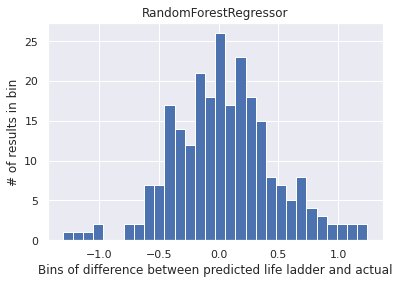

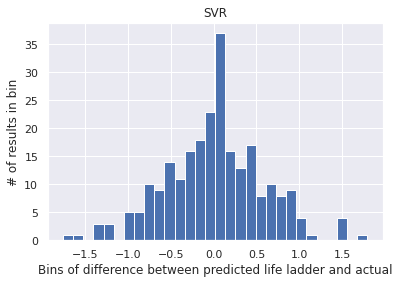

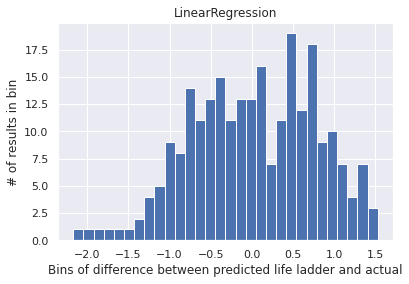

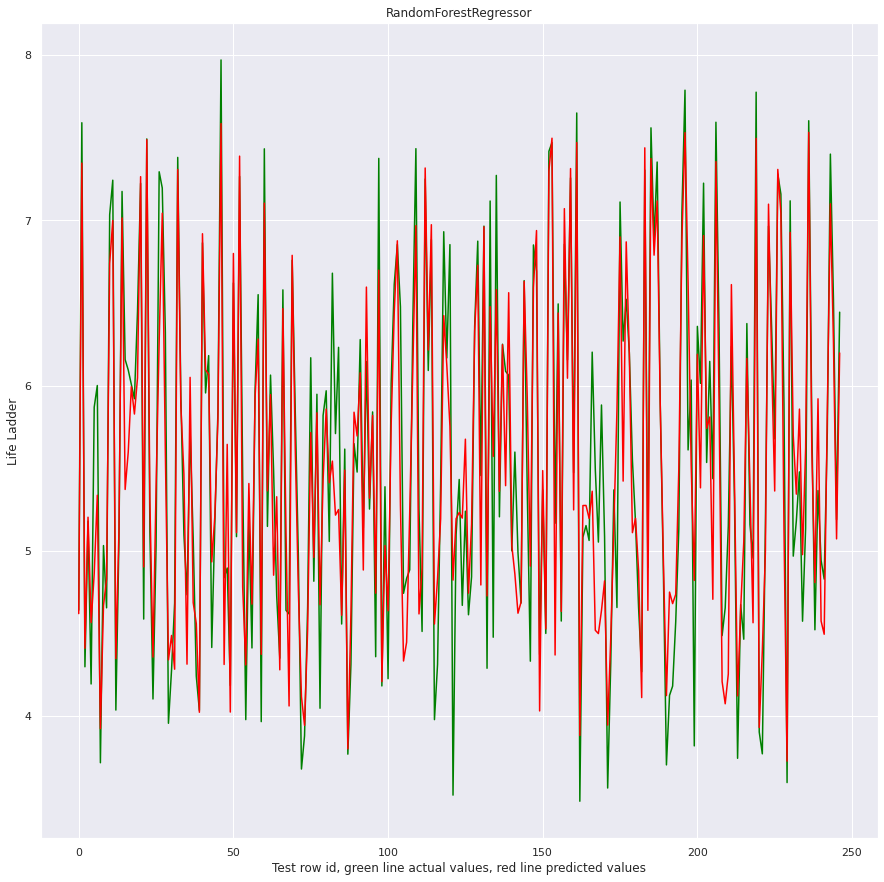

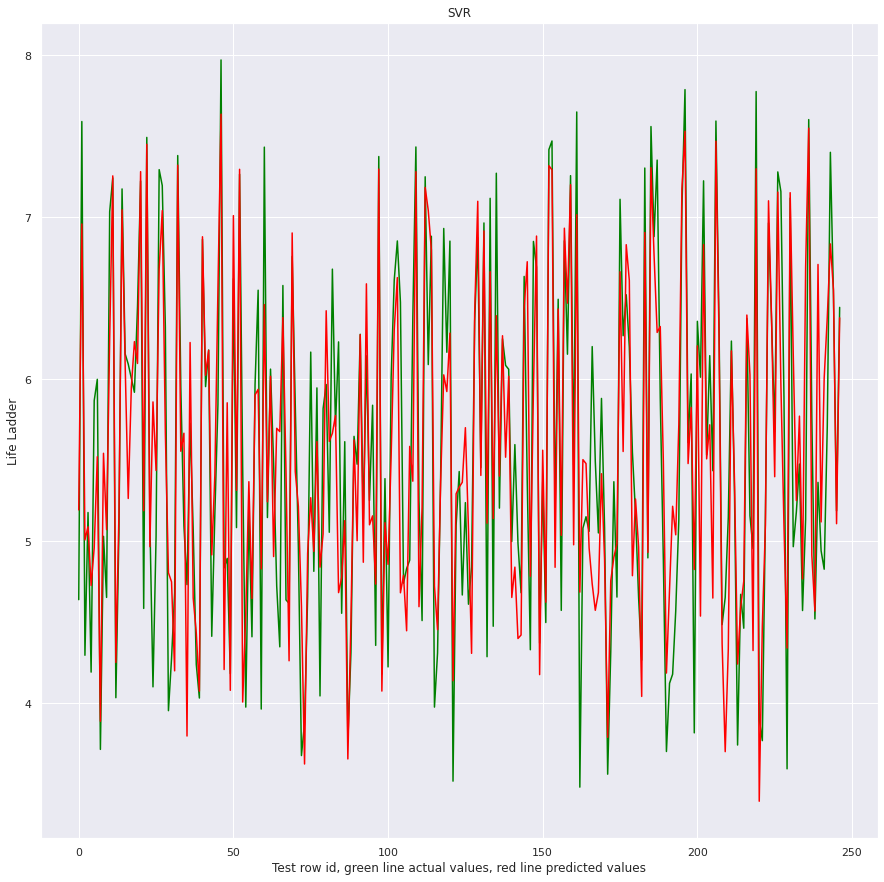

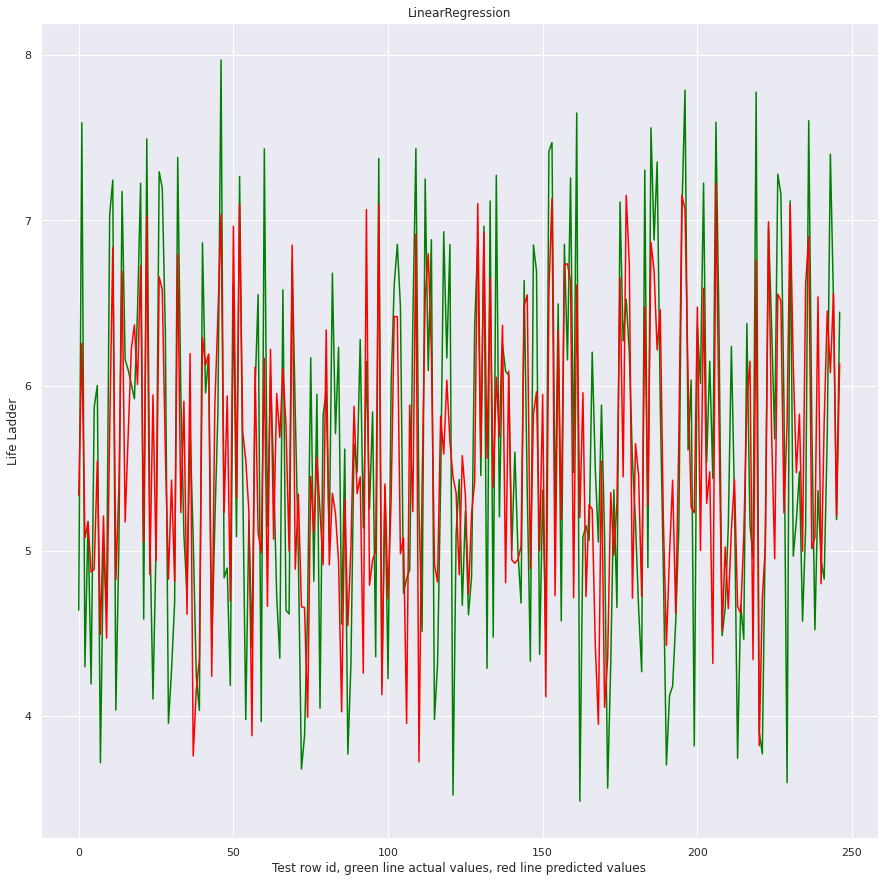

In [ ]:
def plotHistogram(predicted, title):
  lst = [i for i in range(len(predicted))]
  plt.hist(y_test - predicted, bins=30)
  plt.title(str(title).split('(')[0])
  plt.xlabel(f'Bins of difference between predicted life ladder and actual')
  plt.ylabel("# of results in bin")
  plt.show()



def plotScatter(predicted, actual, title):
  lst = [i for i in range(len(predicted))]
  plt.figure(figsize=(15,15))
  plt.plot(lst, actual, color = "green")
  plt.plot(lst, predicted, color = "red")
  plt.title(str(title).split('(')[0])
  plt.xlabel(f'Test row id, green line actual values, red line predicted values')
  plt.ylabel("Life Ladder")
  plt.show()

for model, pred in predictions.items():
  plotHistogram(pred, model)

for model, pred in predictions.items():
  plotScatter(pred, y_test, model)


Feature importances and specific cases

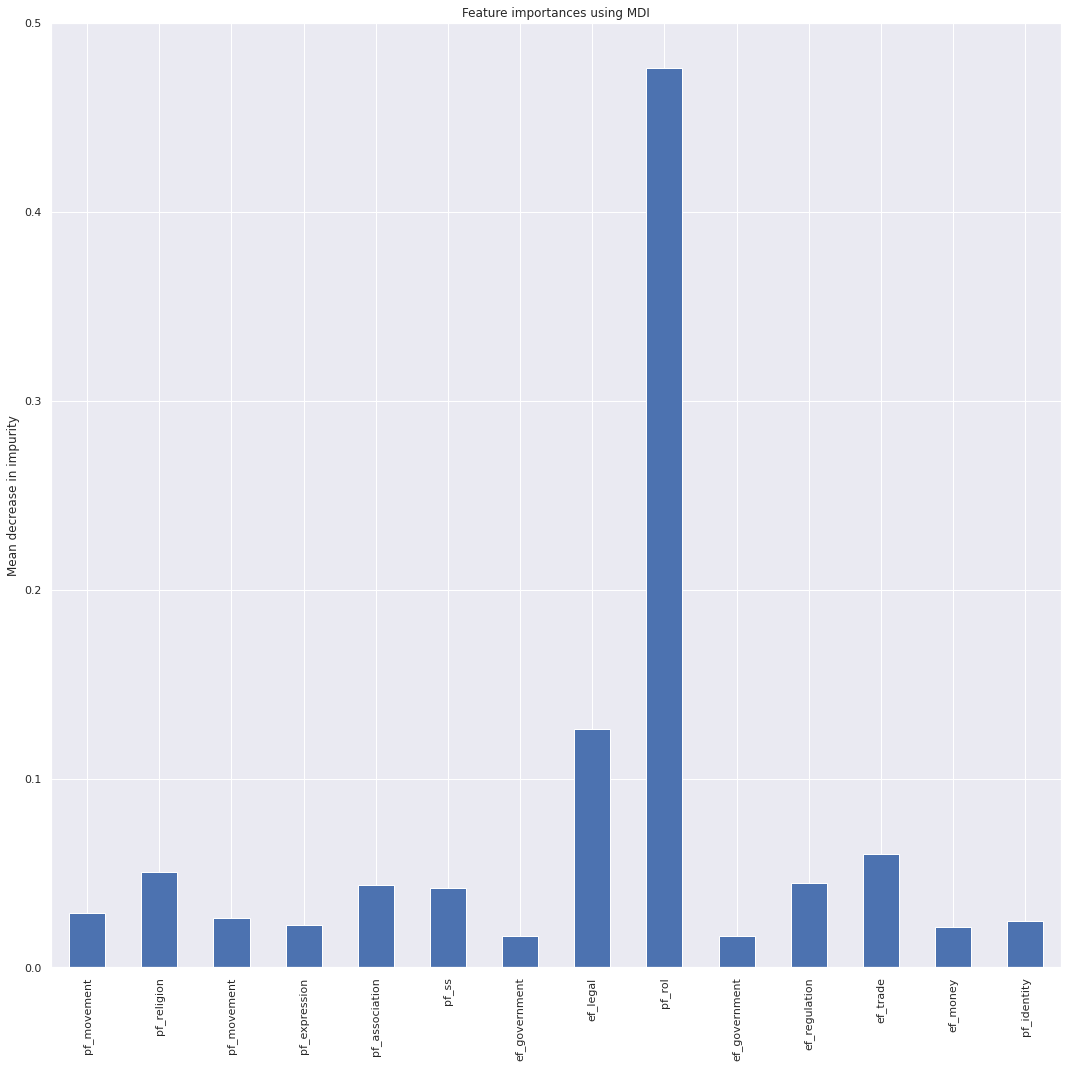

In [ ]:
importances = RF_regr.feature_importances_
std = np.std([
    RF_regr.feature_importances_ for tree in RF_regr.estimators_], axis=0)

forest_importances = pd.Series(importances, index=regr_feature_cols)

fig, ax = plt.subplots(figsize=(15,15))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Calculate which features should be changed to achieve greatest happiness score

In [ ]:
# Method for finding columns that change happiness the most
def whichFeatureColumnsToChange(row, features):
  # copy the dataframe so it doesnt change in place
  row = row.apply(lambda x: x)
  start_prediction = RF_regr.predict(row[features])[0]
  MAX_VAL = 10.0
  print(f'Happiness prediction for {row["countries"].values[0]}, {row["year"].values[0]}:')
  print(f'{start_prediction}\n')
  
  feature_improvement_dict = {}
  for f in features:
    prev_val = row[f].values[0]
    row[f] = MAX_VAL
    pred = RF_regr.predict(row[regr_feature_cols])
    feature_improvement_dict[f] = pred[0]
    row[f] = prev_val

  best = max(feature_improvement_dict, key=feature_improvement_dict.get)
  
  print(f'To achieve highest predicted happiness score by changing one column:')
  print(f'  change \"{best}\" from: {row[best].values[0]} -> {MAX_VAL}')
  print(f'  changing predicted happiness score from {start_prediction} to {feature_improvement_dict[best]}')
  print(f'  a predicted happiness increase of {feature_improvement_dict[best] - start_prediction}\n')
  return (best, feature_improvement_dict[best])

# get rows from original dataframe where the rows are from the testing set
temp = df[df.index.isin(X_test.index)]
denmark_test = temp[temp.countries == "Denmark"]

# The danish government would like to see which freedom features to change to get higher happiness score
row = denmark_test.head(1)

whichFeatureColumnsToChange(row, regr_feature_cols)




Happiness prediction for Denmark, 2017:
7.355000000000001

To achieve highest predicted happiness score by changing one column:
  change "pf_expression" from: 9.0 -> 10.0
  changing predicted happiness score from 7.355000000000001 to 7.56876
  a predicted happiness increase of 0.21375999999999884



('pf_expression', 7.56876)

In [ ]:
# get rows from original dataframe where the rows are from the testing set
temp = df[df.index.isin(X_test.index)]
denmark_test = temp[temp.countries == "Denmark"]

# The danish government would like to see which freedom features to change to get higher happiness score
row = denmark_test.head(1)

row["ef_government"]

452    5.1
Name: ef_government, dtype: float64

**Model number 2**

In [ ]:
classification_feature_cols = ["pf_movement", "pf_religion", "pf_expression", 
                   "pf_association", "pf_ss", "ef_government", "ef_legal", "pf_rol", 
                   "ef_regulation", "ef_trade", "ef_money", "Life Ladder"]

output_feature = ["pf_identity_sex_female", "pf_identity_sex_male"]
# 5 MEANS ONLY LEGAL SOME PLACE IN COUNTRY, THEREFORE WE CHANGE 5 TO 0
df["pf_identity_sex_female"] = df.apply(lambda x: 10 if x["pf_identity_sex_female"] == 10 else 0, axis =1)
df["pf_identity_sex_male"] = df.apply(lambda x: 10 if x["pf_identity_sex_male"] == 10 else 0, axis =1)

random_state = 666
X_train, X_test, y_train, y_test = train_test_split(df[classification_feature_cols], df[output_feature], test_size=0.2, random_state=random_state) 

In [ ]:
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)


[[   0  452]
 [  10 1524]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators = 50)
# Train the model on training data
rf.fit(X_train, y_train);

y_pred_rfc = rf.predict(X_test)

                precision    recall  f1-score   support

  m-to-m legal       0.95      0.80      0.87        76
m-to-m illegal       0.92      0.98      0.95       171

      accuracy                           0.93       247
     macro avg       0.94      0.89      0.91       247
  weighted avg       0.93      0.93      0.93       247



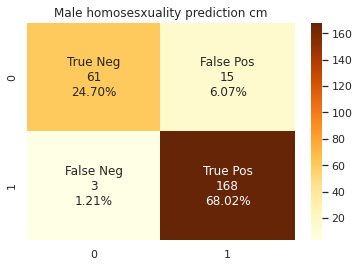

In [ ]:
from sklearn.metrics import classification_report

# SEX MALE
cf_matrix_RF = confusion_matrix(y_test.values[:,1], y_pred_rfc[:,1])

group_names2 = ["True Neg","False Pos","False Neg","True Pos"]
group_counts2 = ["{0:0.0f}".format(value) for value in cf_matrix_RF.flatten()]
group_percentages2 = ["{0:.2%}".format(value) for value in cf_matrix_RF.flatten()/np.sum(cf_matrix_RF)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names2,group_counts2,group_percentages2)]
labels2 = np.asarray(labels).reshape(2,2)


print(classification_report(y_test.values[:,1], y_pred_rfc[:,1], target_names=["m-to-m legal", "m-to-m illegal"]))
ax = plt.axes()
ax.set_title('Male homosesxuality prediction cm')
sns.heatmap(cf_matrix_RF, annot=labels2, fmt="", cmap='YlOrBr', ax=ax) 
plt.show()



                precision    recall  f1-score   support

  f-to-f legal       0.86      0.67      0.76        46
f-to-f illegal       0.93      0.98      0.95       201

      accuracy                           0.92       247
     macro avg       0.90      0.82      0.85       247
  weighted avg       0.92      0.92      0.92       247



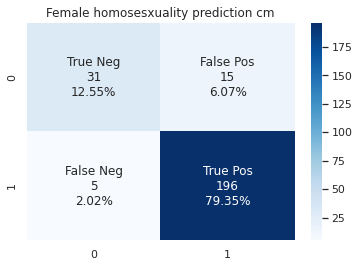

In [ ]:
# SEX FEMALE
cf_matrix_RF = confusion_matrix(y_test.values[:,0], y_pred_rfc[:,0])

group_names2 = ["True Neg","False Pos","False Neg","True Pos"]
group_counts2 = ["{0:0.0f}".format(value) for value in cf_matrix_RF.flatten()]
group_percentages2 = ["{0:.2%}".format(value) for value in cf_matrix_RF.flatten()/np.sum(cf_matrix_RF)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names2,group_counts2,group_percentages2)]
labels2 = np.asarray(labels).reshape(2,2)


print(classification_report(y_test.values[:,0], y_pred_rfc[:,0], target_names=["f-to-f legal", "f-to-f illegal"]))
ax = plt.axes()

ax.set_title('Female homosesxuality prediction cm')
sns.heatmap(cf_matrix_RF, annot=labels2, fmt="", cmap='Blues', ax=ax ) 
plt.show()

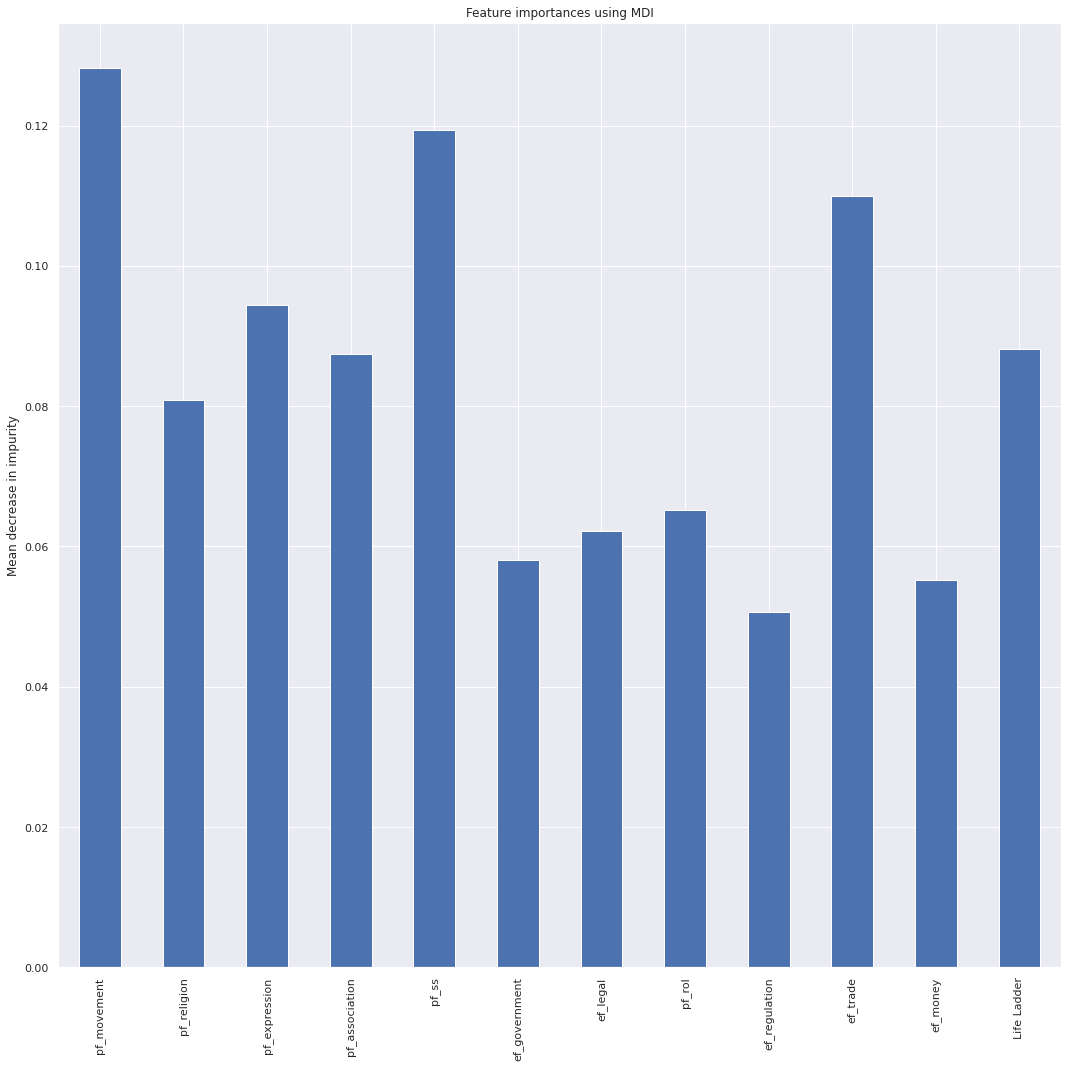

In [ ]:
# VIEW FEATURE IMPORTANCES FOR RFR

importances = rf.feature_importances_
std = np.std([
    rf.feature_importances_ for tree in rf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=classification_feature_cols)

fig, ax = plt.subplots(figsize=(15,15))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()